In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline
plt.style.use(['seaborn-deep'])
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [3]:
data = pd.read_csv('Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data', index_col = 0)

In [4]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [12]:
scalar.fit(data.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scalar.transform(data.drop('TARGET CLASS', axis = 1))

In [20]:
data_feat = pd.DataFrame(scaled_features, columns=data.columns[0:10])

In [21]:
data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = data_feat

In [24]:
y = data['TARGET CLASS']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [32]:
print(X_train.shape, " ", X_test.shape)

(700, 10)   (300, 10)


In [33]:
print(y_train.shape, " ", y_test.shape)

(700,)   (300,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier(n_neighbors = 17)

In [115]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [116]:
predictions = knn.predict(X_test)

In [117]:
print(predictions)

[0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 1 1 0]


In [118]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

In [119]:
print(mean_absolute_error(y_test, predictions))

0.05


In [120]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

0.22360679774997896


In [121]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [122]:
print(confusion_matrix(y_test, predictions))

[[153   6]
 [  9 132]]


In [48]:
error_rate = list()
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [49]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rates')

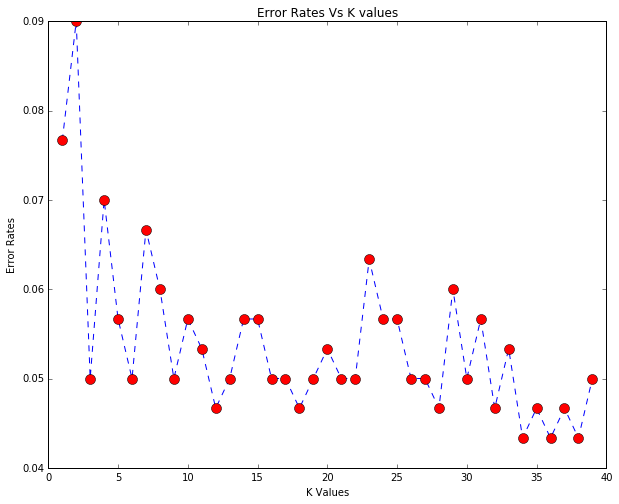

In [90]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 10, linestyle = '--')
plt.title('Error Rates Vs K values')
plt.xlabel('K Values')
plt.ylabel('Error Rates')